# PolyaClassifier performance by split

**Purpose**: To assess the performance of individual constituent models included in the final ensemble.


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
%run -i notebook_setup.py

## IMPORTS AND SETUP

In [4]:
from paper_utilities import models

In [5]:
PROJECT   = "/projects/b1080/eks/polyadenylation/yeast"
OUTDIR    = os.path.join(PROJECT, 'manuscript', 'analysis', 'polyaclassifier_model_split_performance')
RESOURCES = os.path.join(os.path.dirname(OUTDIR), 'resources')
os.makedirs(OUTDIR, exist_ok = True)


In [6]:
boxplot_format = {
    'boxprops' : {'edgecolor' : 'black', 'linewidth' : 0.5},
    'medianprops' : {'color' : 'black', 'linewidth' : 0.5},
    'whiskerprops' : {'color' : 'black', 'linewidth' : 0.5},
    'capprops' : {'color' : 'black', 'linewidth' : 0.5},
    'flierprops' : {'color' : 'black'},
    'showfliers' : False
}

barplot_format = {
    'color'     : 'lightgray',
    'edgecolor' : 'black',
    'linewidth' : 0.5
}

## HELPER FUNCTIONS

In [7]:
def fetch_split_data_predictions(species, model_stamp, split = 'val'):
    
    matches = glob.glob(os.path.join(PROJECT, species, 'model','classification_only','checkpoints',f'{model_stamp}*', 'evaluations', 'epochs', f'{split}_data.with_predictions.*threshold*.txt'))
    
    if (len(matches) == 0):
        raise ValueError(f"No prediction file found for {species} {model_stamp}: {str(matches)}")
    if (len(matches) > 1):
        raise ValueError(f"Multiple prediction files found for {species} {model_stamp}: {str(matches)}")
    
    return pd.read_csv(matches[0], sep = "\t")


## ANALYSIS

### *S. cerevisiae*

In [8]:
scer_models = ['20240422-094557', '20240422-094624', '20240422-094653']


In [9]:
scer_results = {
    'stamp' : [],
    'split' : [],
    'auroc' : [],
    'auprc' : [],
}

for m in scer_models:
    for s in ['train','val','test']:
    
        pred_dt = fetch_split_data_predictions('saccharomyces_cerevisiae', m, s)
        auroc, auprc = models.calculate_auc(pred_dt['obs_class'], pred_dt['pred_class'])

        scer_results['stamp'].append(m)
        scer_results['split'].append(s)
        scer_results['auroc'].append(auroc)
        scer_results['auprc'].append(auprc)

scer_results = pd.DataFrame.from_dict(scer_results, orient = 'columns')
print(scer_results.shape)

scer_summary = scer_results.groupby('split').agg({'auroc': ['mean','std'], 'auprc' : ['mean','std']}).loc[['train','val','test']]
print(scer_summary)


(9, 4)
          auroc               auprc          
           mean       std      mean       std
split                                        
train  0.999786  0.000245  0.999797  0.000232
val    0.987999  0.000725  0.988930  0.000949
test   0.985787  0.000523  0.986108  0.000632


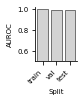

In [10]:
fig,ax = plt.subplots(1,1, figsize = (0.75,1))

ax.bar(scer_summary.index, scer_summary['auroc']['mean'], **barplot_format)
ax.errorbar(x = scer_summary.index, y = scer_summary['auroc']['mean'], 
            yerr = scer_summary['auroc']['std'], fmt = 'none',
            ecolor = 'black', elinewidth=5, barsabove = True, 
           )

ax.set_xlabel('Split')
ax.set_xticks(scer_summary.index)
ax.set_xticklabels(scer_summary.index, rotation = 45, ha = 'right', va = 'top')

ax.set_ylabel('AUROC')
ax.set_ylim(0.5,1.02)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig(os.path.join(OUTDIR, f'performance_by_split.saccharomyces_cerevisiae.auroc.svg'), format = 'svg', dpi = 600)
plt.show()


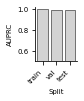

In [11]:
fig,ax = plt.subplots(1,1, figsize = (0.75,1))

ax.bar(scer_summary.index, scer_summary['auprc']['mean'], **barplot_format)
ax.errorbar(x = scer_summary.index, y = scer_summary['auprc']['mean'], 
            yerr = scer_summary['auprc']['std'], fmt = 'none',
            ecolor = 'black', elinewidth=5, barsabove = True, 
           )

ax.set_xlabel('Split')
ax.set_xticks(scer_summary.index)
ax.set_xticklabels(scer_summary.index, rotation = 45, ha = 'right', va = 'top')

ax.set_ylabel('AUPRC')
ax.set_ylim(0.5,1.02)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig(os.path.join(OUTDIR, f'performance_by_split.saccharomyces_cerevisiae.auprc.svg'), format = 'svg', dpi = 600)
plt.show()


### *S. pombe*

In [12]:
spom_models = ['20240422-094802', '20240422-094812', '20240422-094843']


In [13]:
spom_results = {
    'stamp' : [],
    'split' : [],
    'auroc' : [],
    'auprc' : [],
}

for m in spom_models:
    for s in ['train','val','test']:
    
        pred_dt = fetch_split_data_predictions('schizosaccharomyces_pombe', m, s)
        auroc, auprc = models.calculate_auc(pred_dt['obs_class'], pred_dt['pred_class'])

        spom_results['stamp'].append(m)
        spom_results['split'].append(s)
        spom_results['auroc'].append(auroc)
        spom_results['auprc'].append(auprc)

spom_results = pd.DataFrame.from_dict(spom_results, orient = 'columns')
print(spom_results.shape)

spom_summary = spom_results.groupby('split').agg({'auroc': ['mean','std'], 'auprc' : ['mean','std']}).loc[['train','val','test']]
print(spom_summary)


(9, 4)
          auroc               auprc          
           mean       std      mean       std
split                                        
train  0.999015  0.000596  0.999023  0.000547
val    0.982771  0.001666  0.982286  0.004085
test   0.982944  0.001126  0.982485  0.001606


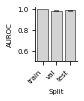

In [14]:
fig,ax = plt.subplots(1,1, figsize = (0.75,1))

ax.bar(spom_summary.index, spom_summary['auroc']['mean'], **barplot_format)
ax.errorbar(x = spom_summary.index, y = spom_summary['auroc']['mean'], 
            yerr = spom_summary['auroc']['std'], fmt = 'none',
            ecolor = 'black', elinewidth=5, barsabove = True, 
           )

ax.set_xlabel('Split')
ax.set_xticks(spom_summary.index)
ax.set_xticklabels(spom_summary.index, rotation = 45, ha = 'right', va = 'top')

ax.set_ylabel('AUROC')
ax.set_ylim(0.5,1.02)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig(os.path.join(OUTDIR, f'performance_by_split.schizosaccharomyces_pombe.auroc.svg'), format = 'svg', dpi = 600)
plt.show()


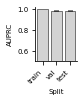

In [15]:
fig,ax = plt.subplots(1,1, figsize = (0.75,1))

ax.bar(spom_summary.index, spom_summary['auprc']['mean'], **barplot_format)
ax.errorbar(x = spom_summary.index, y = spom_summary['auprc']['mean'], 
            yerr = spom_summary['auprc']['std'], fmt = 'none',
            ecolor = 'black', elinewidth=5, barsabove = True, 
           )

ax.set_xlabel('Split')
ax.set_xticks(spom_summary.index)
ax.set_xticklabels(spom_summary.index, rotation = 45, ha = 'right', va = 'top')

ax.set_ylabel('AUPRC')
ax.set_ylim(0.5,1.02)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig(os.path.join(OUTDIR, f'performance_by_split.schizosaccharomyces_pombe.auprc.svg'), format = 'svg', dpi = 600)
plt.show()


### *A. thaliana*

In [16]:
atha_models = ['20240422-094938', '20240422-094958', '20240422-095014']


In [17]:
atha_results = {
    'stamp' : [],
    'split' : [],
    'auroc' : [],
    'auprc' : [],
}

for m in atha_models:
    for s in ['train','val','test']:
    
        pred_dt = fetch_split_data_predictions('arabidopsis_thaliana', m, s)
        auroc, auprc = models.calculate_auc(pred_dt['obs_class'], pred_dt['pred_class'])

        atha_results['stamp'].append(m)
        atha_results['split'].append(s)
        atha_results['auroc'].append(auroc)
        atha_results['auprc'].append(auprc)

atha_results = pd.DataFrame.from_dict(atha_results, orient = 'columns')
print(atha_results.shape)

atha_summary = atha_results.groupby('split').agg({'auroc': ['mean','std'], 'auprc' : ['mean','std']}).loc[['train','val','test']]
print(atha_summary)


(9, 4)
          auroc               auprc          
           mean       std      mean       std
split                                        
train  0.999807  0.000262  0.999802  0.000274
val    0.993315  0.000900  0.992999  0.001173
test   0.992966  0.000273  0.992534  0.000221


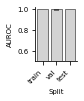

In [18]:
fig,ax = plt.subplots(1,1, figsize = (0.75,1))

ax.bar(atha_summary.index, atha_summary['auroc']['mean'], **barplot_format)
ax.errorbar(x = atha_summary.index, y = atha_summary['auroc']['mean'], 
            yerr = atha_summary['auroc']['std'], fmt = 'none',
            ecolor = 'black', elinewidth=5, barsabove = True, 
           )

ax.set_xlabel('Split')
ax.set_xticks(atha_summary.index)
ax.set_xticklabels(atha_summary.index, rotation = 45, ha = 'right', va = 'top')

ax.set_ylabel('AUROC')
ax.set_ylim(0.5,1.02)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig(os.path.join(OUTDIR, f'performance_by_split.arabidopsis_thaliana.auroc.svg'), format = 'svg', dpi = 600)
plt.show()


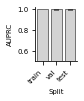

In [19]:
fig,ax = plt.subplots(1,1, figsize = (0.75,1))

ax.bar(atha_summary.index, atha_summary['auprc']['mean'], **barplot_format)
ax.errorbar(x = atha_summary.index, y = atha_summary['auprc']['mean'], 
            yerr = atha_summary['auprc']['std'], fmt = 'none',
            ecolor = 'black', elinewidth=5, barsabove = True, 
           )

ax.set_xlabel('Split')
ax.set_xticks(atha_summary.index)
ax.set_xticklabels(atha_summary.index, rotation = 45, ha = 'right', va = 'top')

ax.set_ylabel('AUPRC')
ax.set_ylim(0.5,1.02)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig(os.path.join(OUTDIR, f'performance_by_split.arabidopsis_thaliana.auprc.svg'), format = 'svg', dpi = 600)
plt.show()
